# Working with TTree ROOT Files

In [1]:
# Start Notebook:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime
import sys

# Add the path to sys.path temporarily
script_dir = '/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis'
sys.path.append(script_dir)
from MyCommonAnalysisFunction_richcap import *
from Pion_Test_Fiducial_Cuts_Defs     import polygon_pip_secs
# Now you can remove the path if you wish
sys.path.remove(script_dir)
del script_dir

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

print(f"{color.BOLD}\nStarting RG-A SIDIS Analysis\n{color.END}")

# getting current date
datetime_object_full = datetime.now()

startMin_full = datetime_object_full.minute
startHr_full  = datetime_object_full.hour

timeMin_full = "".join(["0", str(datetime_object_full.minute)]) if(datetime_object_full.minute < 10) else str(datetime_object_full.minute)

Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", str(timeMin_full), " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour),      ":", str(timeMin_full), " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour),      ":", str(timeMin_full), " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD,                                    "12:", str(timeMin_full), " a.m.", color.END]))
print("")


Starting RG-A SIDIS Analysis


Started running on 9-20-2024 at 3:14 p.m.



.

.

.

# Load RDataFrames

In [2]:
# Load ROOT Files:
def FileLocation(FileName, Datatype):
    location = "/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/TTree_Files_ROOT/"
    # location = "TTree_Files_ROOT/"
    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/DataFrame_SIDIS_epip_Data_REC_",         str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/DataFrame_SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/DataFrame_SIDIS_epip_MC_GEN_",              str(FileName), ".root"])
    loading  = "".join([location, file])
    return loading

def FileLocation_Load(FileName, Datatype):
    df = ROOT.RDataFrame("h22", str(FileLocation(str(FileName), str(Datatype))))
    return df

################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################

# Smearing_Options = "no_smear"

Common_Name = "Pass_2_New_TTree_V1_All"


# # Cut_Configuration_Name = "_FC_11" # After Valerii's Cuts - Before my Cuts
# # Cut_Configuration_Name = "_FC_12" # After Valerii's Cuts and my new electron DC refinements - Before my π+ DC Cuts
# Cut_Configuration_Name = ""
# # Cut_Configuration_Name = "_FC7" # Before Valerii's Cuts
# Common_Name = f"Pass_2_New_Fiducial_Cut_Test{Cut_Configuration_Name}_V9_All"

Standard_Histogram_Title_Addition = ""

Pass_Version = "Pass 2" if("Pass_2" in Common_Name) else "Pass 1"
if(Pass_Version not in [""]):
    if(Standard_Histogram_Title_Addition not in [""]):
        Standard_Histogram_Title_Addition = f"{Pass_Version} - {Standard_Histogram_Title_Addition}"
    else:
        Standard_Histogram_Title_Addition = Pass_Version


print(f"{color.BBLUE}\nRunning with {Pass_Version} files\n\n{color.END}")
        
        
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
if(False):
    REAL_File_Name = Common_Name
else:
    REAL_File_Name = "Pass_2_5D_Unfold_Test_V7_All" if(Pass_Version in ["Pass 2"]) else "5D_Unfold_Test_V7_All"
    REAL_File_Name = "Pass_2_New_TTree_V1_5164"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
if(False):
    MC_REC_File_Name = Common_Name
else:
    # MC_REC_File_Name = f"Unsmeared_{Common_Name}" if(Smearing_Options in ["no_smear"]) else Common_Name
    # if(Pass_Version not in ["Pass 2"]):
    #     MC_REC_File_Name = MC_REC_File_Name.replace("Pass_2_", "")
    MC_REC_File_Name = "Pass_2_New_TTree_V1_7901_4"
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
# if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Gen_Cuts_V2_Fixed_All"
    MC_GEN_File_Name = "Pass_2_New_Sector_Cut_Test_V9_All"
####################################
##   Generated Monte Carlo Data   ##
####################################


################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = FileLocation_Load(str(REAL_File_Name), "rdf")
    print("".join(["The (current) total number of columns available for the", color.BLUE,  " Real (Experimental) Data",       color.END, " in       '", color.BOLD, REAL_File_Name,   color.END, "' is ", color.BOLD, str(len(rdf.GetColumnNames())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    mdf = FileLocation_Load(str(MC_REC_File_Name), "mdf")
    print("".join(["The (current) total number of columns available for the", color.RED,   " Reconstructed Monte Carlo Data", color.END, " in '",       color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetColumnNames())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    gdf = FileLocation_Load(str(MC_GEN_File_Name), "gdf")
    print("".join(["The (current) total number of columns available for the", color.GREEN, " Generated Monte Carlo Data",     color.END, " in     '",   color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetColumnNames())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print(f"{color.BOLD}\nPass Version in use is:{color.END}{color.BLUE} {Pass_Version}{color.END_B}\n\n\nDone Loading TTree files...\n\n{color.END}")


Running with Pass 2 files



Not using the common file name for the Real (Experimental) Data...


Not using the common file name for the Reconstructed Monte Carlo Data...

The (current) total number of columns available for the Real (Experimental) Data in       'Pass_2_New_TTree_V1_5164' is 93
The (current) total number of columns available for the Reconstructed Monte Carlo Data in 'Pass_2_New_TTree_V1_7901_4' is 167
The (current) total number of columns available for the Generated Monte Carlo Data in     'Pass_2_New_TTree_V1_All' is 48

Pass Version in use is: Pass 2


Done Loading TTree files...




.

.

## Check Columns of RDataFrames

In [3]:
# Run Checks:
if(not True):
    # Check 'rdf':
    if(True and ("class cppyy.gbl.ROOT.RDataFrame" in str(type(rdf)))):
        print(f"For {color.BOLD}'rdf'{color.END}:")
        for num, ii in enumerate(rdf.GetColumnNames()):
            print(f"\tColumn {str(num+1).rjust(3)}) {color.BOLD}{str(ii).ljust(40)}{color.END}")
            # print(f"\tColumn {str(num+1).rjust(3)}) {str(ii).ljust(35)} | (type -> {type(ii)})")
    elif("class cppyy.gbl.ROOT.RDataFrame" not in str(type(rdf))):
        print(f"\n{color.Error}ERROR: 'rdf' is NOT an RDataFrame\n{color.END}")
    
    print("\n")
    
    # Check 'mdf':
    if(True and ("class cppyy.gbl.ROOT.RDataFrame" in str(type(mdf)))):
        print(f"For {color.BOLD}'mdf'{color.END}:")
        for num, ii in enumerate(mdf.GetColumnNames()):
            print(f"\tColumn {str(num+1).rjust(3)}) {color.BOLD}{str(ii).ljust(40)}{color.END}")
    elif("class cppyy.gbl.ROOT.RDataFrame" not in str(type(mdf))):
        print(f"\n{color.Error}ERROR: 'mdf' is NOT an RDataFrame\n{color.END}")
    
    print("\n")
    
    # Check 'gdf':
    if(True and ("class cppyy.gbl.ROOT.RDataFrame" in str(type(gdf)))):
        print(f"For {color.BOLD}'gdf'{color.END}:")
        for num, ii in enumerate(gdf.GetColumnNames()):
            print(f"\tColumn {str(num+1).rjust(3)}) {color.BOLD}{str(ii).ljust(40)}{color.END}")
    elif("class cppyy.gbl.ROOT.RDataFrame" not in str(type(gdf))):
        print(f"\n{color.Error}ERROR: 'gdf' is NOT an RDataFrame\n{color.END}")
    
    print("\n\nDone\n\n")
else:
    print(f"\n{color.BOLD}Not currently running this cell\n{color.END}")


Not currently running this cell



.

.

.

# Creating Histograms

.

.

.

# For Fiducial Cuts (Tests):

In [4]:
# if(True):
#     ROOT.gStyle.SetTitleOffset(1.5,'y')
#     # ROOT.gStyle.SetTitleOffset(-1.5)
#     ROOT.gStyle.SetTitleOffset(1.2,'x')
#     def Ratio_of_2D_Histos(out_hist, rdf_hist, mdf_hist):
#         for x_bin in range(0,      out_hist.GetNbinsX() + 1):
#             for y_bin in range(0,  out_hist.GetNbinsY() + 1):
#                 Histo_rdf_value  = rdf_hist.GetBinContent(x_bin, y_bin)
#                 Histo_mdf_value  = mdf_hist.GetBinContent(x_bin, y_bin)
#                 # Histo_rdf_value  = round(Histo_rdf_value, 10)
#                 # Histo_mdf_value  = round(Histo_mdf_value, 10)
#                 if(Histo_rdf_value == 0):
#                     percent_diff = 10000 if(Histo_mdf_value != 0) else 0
#                 else:
#                     percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
#                 if(percent_diff   < 20):
#                     percent_diff  = 0
#                 out_hist.SetBinContent(x_bin, y_bin, percent_diff)
#         return out_hist

#     def Normalize_Histogram(histogram):
#         integral = histogram.Integral()
#         # Check if the integral is non-zero to avoid division by zero
#         if(integral != 0):
#             # histogram.Scale(1.0 / integral)
#             histogram.Scale(100 / integral)
#         return histogram

#     def is_point_in_polygon(x, y, polygon):
#         def angle(x1, y1, x2, y2):
#             return math.atan2(y2 - y1, x2 - x1)
#         winding_number = 0
#         num_vertices = len(polygon)
#         for i in range(num_vertices):
#             x1, y1 = polygon[i]
#             x2, y2 = polygon[(i + 1) % num_vertices]
#             a1 = angle(x, y, x1, y1)
#             a2 = angle(x, y, x2, y2)
#             angle_diff = a2 - a1
#             if(angle_diff > math.pi):
#                 angle_diff -= 2 * math.pi
#             elif(angle_diff < -math.pi):
#                 angle_diff += 2 * math.pi
#             winding_number += angle_diff
#         return abs(winding_number) > math.pi

#     def apply_cut_on_boxes_3D(histogram, box_borders):
#         for binz in range(0, histogram.GetNbinsZ() + 2):
#             for biny in range(0, histogram.GetNbinsY() + 2):
#                 DCy = histogram.GetZaxis().GetBinCenter(binz)
#                 DCx = histogram.GetYaxis().GetBinCenter(biny)
#                 # Perform the cut check based only on DCx and DCy
#                 if(not (any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders))):
#                 # if((any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders))):
#                     for binx in range(0, histogram.GetNbinsX() + 2):
#                         # angle = histogram.GetXaxis().GetBinCenter(binx)
#                         histogram.SetBinContent(binx, biny, binz, 0)  # Set bin content to zero
#         return histogram

#     def set_common_yaxis_range(hist1, hist2, hist3="N/A", hist4="N/A"):
#         # Initialize variables for global min and max
#         global_min = float('inf')
#         global_max = float('-inf')
#         # Loop over the bins of the first histogram
#         for bin_ii in range(1, hist1.GetNbinsX() + 1):
#             content = hist1.GetBinContent(bin_ii)
#             error   = hist1.GetBinError(bin_ii)
#             # Update global min/max with content ± error
#             global_min = min(global_min, content - error)
#             global_max = max(global_max, content + error)
#         # Loop over the bins of the second histogram
#         for bin_ii in range(1, hist2.GetNbinsX() + 1):
#             content = hist2.GetBinContent(bin_ii)
#             error   = hist2.GetBinError(bin_ii)
#             # Update global min/max with content ± error
#             global_min = min(global_min, content - error)
#             global_max = max(global_max, content + error)
#         if(hist3 not in ["N/A"]):
#             for bin_ii in range(1, hist3.GetNbinsX() + 1):
#                 content = hist3.GetBinContent(bin_ii)
#                 error   = hist3.GetBinError(bin_ii)
#                 # Update global min/max with content ± error
#                 global_min = min(global_min, content - error)
#                 global_max = max(global_max, content + error)
#         if(hist4 not in ["N/A"]):
#             for bin_ii in range(1, hist4.GetNbinsX() + 1):
#                 content = hist4.GetBinContent(bin_ii)
#                 error   = hist4.GetBinError(bin_ii)
#                 # Update global min/max with content ± error
#                 global_min = min(global_min, content - error)
#                 global_max = max(global_max, content + error)
#         global_min = 1.2*global_min if(global_min < 0) else 0.8*global_min
#         global_max = 1.5*global_max if(global_max > 0) else 0.8*global_max

#         # Set the y-axis range for both histograms to the common range
#         hist1.GetYaxis().SetRangeUser(global_min, global_max)
#         hist2.GetYaxis().SetRangeUser(global_min, global_max)
#         if(hist3 not in ["N/A"]):
#             hist3.GetYaxis().SetRangeUser(global_min, global_max)
#         if(hist4 not in ["N/A"]):
#             hist4.GetYaxis().SetRangeUser(global_min, global_max)

#     canvas, histograms, pl = {}, {}, {}
#     ROOT.gStyle.SetOptStat("i")


#     polygon = {}

#     Particle = "pip"
#     Particle_Title = "#pi^{+} Pion" if(Particle in ["pip"]) else "Electron"
#     DC_Layer = 6

#     Search_Include = ["(Histo-Group='Normal_3D')", "(Data-Cut='cut_Complete_SIDIS')", "(Smear-Type='')"]

#     # Search_Include.append("Var-D1='ele_x_DC")
#     # Search_Include.append("ele_x_DC_18_rot")
#     Search_Include.append(f"Var-D1='{Particle}_x_DC")
#     Search_Include.append(f"{Particle}_x_DC_{DC_Layer}")
#     # Search_Include.append(f"{Particle}_x_DC_{DC_Layer}_rot")

#     particle_angle = "pipPhi"
#     # particle_angle = "pipth"
#     particle_angle_Title = "".join(["#phi" if("Phi" in particle_angle) else "#theta", "_{", "#pi^{+} Pion" if("pip" in particle_angle) else "Electron", "}"])
#     Search_Include.append(particle_angle)
#     # Search_Include.append("pipth")

#     Search_Exclude = ["(Data-Cut='no_cut')"]
#     Search_Exclude.append("elPhi")
#     Search_Exclude.append("elth")

#     Search_Exclude.append("_rot")


#     Rotation_Conditions = ("_rot" not in Search_Exclude)
#     Rotation_Conditions = False

#     Sector = "All"
#     # Sector = 3
#     if(Rotation_Conditions):
#         x_axis_DC_min, x_axis_DC_max         = -200, 200
#         y_axis_DC_min, y_axis_DC_max         = -100 - (50*int((DC_Layer/6)/3)), 100 + (50*int((DC_Layer/6)/3))
#     else:
#         if(DC_Layer in [6]):
#             x_axis_DC_min, x_axis_DC_max     = -150, 150
#             y_axis_DC_min, y_axis_DC_max     = -175, 175
#             if(Sector == 1):
#                 x_axis_DC_min, x_axis_DC_max =    0, 150
#                 y_axis_DC_min, y_axis_DC_max = -100, 100
#             if(Sector == 2):
#                 x_axis_DC_min, x_axis_DC_max = -50,  150
#                 y_axis_DC_min, y_axis_DC_max =   0,  150
#             if(Sector == 3):
#                 x_axis_DC_min, x_axis_DC_max = -150,  50
#                 y_axis_DC_min, y_axis_DC_max =    0, 150
#             if(Sector == 4):
#                 x_axis_DC_min, x_axis_DC_max = -150,   0
#                 y_axis_DC_min, y_axis_DC_max = -100, 100
#             if(Sector == 5):
#                 x_axis_DC_min, x_axis_DC_max = -150,  50
#                 y_axis_DC_min, y_axis_DC_max = -160,   0
#             if(Sector == 6):
#                 x_axis_DC_min, x_axis_DC_max =  -50, 150
#                 y_axis_DC_min, y_axis_DC_max = -150,   0
#         # if(DC_Layer in [18]):
#         #     h1[SECTOR].GetXaxis().SetRangeUser(-225, 225)
#         #     h1[SECTOR].GetYaxis().SetRangeUser(-250, 300)
#             # h1[SECTOR].GetXaxis().SetRangeUser(-5, 225)
#             # h1[SECTOR].GetYaxis().SetRangeUser(-300, 5)
#             # h1[SECTOR].GetYaxis().SetRangeUser(-100, 100)
#         if(DC_Layer in [18]):
#             x_axis_DC_min, x_axis_DC_max     = -300, 300
#             y_axis_DC_min, y_axis_DC_max     = -300, 300
#             if(Sector in [1]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   300
#                 y_axis_DC_min, y_axis_DC_max = -200, 200
#             if(Sector in [2]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   300
#                 y_axis_DC_min, y_axis_DC_max = -5,   300
#             if(Sector in [3]):
#                 x_axis_DC_min, x_axis_DC_max = -300,   5
#                 y_axis_DC_min, y_axis_DC_max = -5,   300
#             if(Sector in [4]):
#                 x_axis_DC_min, x_axis_DC_max = -300,   5
#                 y_axis_DC_min, y_axis_DC_max = -200, 200
#             if(Sector in [5]):
#                 x_axis_DC_min, x_axis_DC_max = -300,   5
#                 y_axis_DC_min, y_axis_DC_max = -300,   5
#             if(Sector in [6]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   275
#                 y_axis_DC_min, y_axis_DC_max = -250,   5
#         if(DC_Layer in [36]):
#             x_axis_DC_min, x_axis_DC_max     = -500, 500
#             y_axis_DC_min, y_axis_DC_max     = -500, 500
#             if(Sector in [1]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   500
#                 y_axis_DC_min, y_axis_DC_max = -200, 200
#             if(Sector in [2]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   500
#                 y_axis_DC_min, y_axis_DC_max = -5,   500
#             if(Sector in [3]):
#                 x_axis_DC_min, x_axis_DC_max = -500,   5
#                 y_axis_DC_min, y_axis_DC_max = -5,   500
#             if(Sector in [4]):
#                 x_axis_DC_min, x_axis_DC_max = -500,   5
#                 y_axis_DC_min, y_axis_DC_max = -200, 200
#             if(Sector in [5]):
#                 x_axis_DC_min, x_axis_DC_max = -500,   5
#                 y_axis_DC_min, y_axis_DC_max = -500,   5
#             if(Sector in [6]):
#                 x_axis_DC_min, x_axis_DC_max = -5,   500
#                 y_axis_DC_min, y_axis_DC_max = -500,   5

#     quadrilaterals = []
#     if(Rotation_Conditions):
#         quadrilaterals.append(polygon["".join(["Layer_", str(DC_Layer), "_", "" if (DC_Layer not in [6]) else "_", str(Particle)])])
#     else:
#         quadrilaterals = []
#         for sec in range(1 if(str(Sector) in ["All", "0"]) else Sector, 7 if(str(Sector) in ["All", "0"]) else Sector+1, 1):
#             # if(sec in [6]):
#             #     continue
#             quadrilaterals.append(polygon_pip_secs[f"Sector_{sec}"][f"Layer_{DC_Layer}"])
#             print(f"Adding: [Sector_{sec}][Layer_{DC_Layer}]")
#         def apply_cut_on_boxes_3D(histogram, box_borders):
#             for binz in range(0, histogram.GetNbinsZ() + 2):
#                 for biny in range(0, histogram.GetNbinsY() + 2):
#                     DCy = histogram.GetZaxis().GetBinCenter(binz)
#                     DCx = histogram.GetYaxis().GetBinCenter(biny)
#                     # Perform the cut check based only on DCx and DCy
#                     if(any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders)):
#                         for binx in range(0, histogram.GetNbinsX() + 2):
#                             histogram.SetBinContent(binx, biny, binz, 0)  # Set bin content to zero
#             return histogram
        
#         polygon_pip    = {}
#         for DC_Layer_ii in [6, 18, 36]:
#             # polygon_pip["".join(["Layer_",     str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "ele"])] = polygon["".join(["Layer_",           str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "ele"])].copy()
#             polygon_pip["".join(["Layer_",     str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "pip"])] = polygon_pip_secs[f"Sector_{1}"][f"Layer_{DC_Layer_ii}"].copy()
#             for sec in range(2, 7, 1):
#                 polygon_pip["".join(["Layer_", str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "pip"])].append(polygon_pip_secs[f"Sector_{sec}"][f"Layer_{DC_Layer_ii}"])

#     List_of_Cuts = ["Complete_SIDIS_Cuts", "Valerii_DC_Fiducial_Cuts_ele_DC_6", "Valerii_DC_Fiducial_Cuts_ele_DC_18", "Valerii_DC_Fiducial_Cuts_ele_DC_36", "Valerii_OG_Cut", "Valerii_PCal_Fiducial_Cuts", "My_pip_DC_Fiducial_Cuts"]
    
#     rdf_cut = rdf
#     mdf_cut = mdf
#     for cut in List_of_Cuts:
#         rdf_cut = rdf_cut.Filter(cut)
#         mdf_cut = mdf_cut.Filter(cut)


#     histo_name_rdf = f"RDF_{Particle}_DC_Layer_{DC_Layer}_Main"
#     histo_name_mdf = f"MDF_{Particle}_DC_Layer_{DC_Layer}_Main"
    
#     histograms[f"{histo_name_rdf}____Drift_Chamber"] = rdf_cut.Histo2D((f"{histo_name_rdf}____Drift_Chamber", "rdf (DC) Title", 800, -400, 400, 800, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
#     histograms[f"{histo_name_mdf}____Drift_Chamber"] = mdf_cut.Histo2D((f"{histo_name_mdf}____Drift_Chamber", "mdf (DC) Title", 800, -400, 400, 800, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
#     histograms[f"{histo_name_rdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     histograms[f"{histo_name_rdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     histograms[f"{histo_name_mdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     histograms[f"{histo_name_mdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    
#     histograms[f"{histo_name_rdf}_{particle_angle}"] = rdf_cut.Histo1D((f"{histo_name_rdf}_{particle_angle}", "rdf (angle) Title", 720, 0, 360), str(particle_angle))
#     histograms[f"{histo_name_rdf}_{particle_angle}"].SetLineColor(ROOT.kBlue)
#     histograms[f"{histo_name_mdf}_{particle_angle}"] = mdf_cut.Histo1D((f"{histo_name_mdf}_{particle_angle}", "mdf (angle) Title", 720, 0, 360), str(particle_angle))
#     histograms[f"{histo_name_mdf}_{particle_angle}"].SetLineColor(ROOT.kRed)

#     Normalize_Histogram(histograms[f"{histo_name_rdf}____Drift_Chamber"])
#     Normalize_Histogram(histograms[f"{histo_name_rdf}_{particle_angle}"])
#     Normalize_Histogram(histograms[f"{histo_name_mdf}____Drift_Chamber"])
#     Normalize_Histogram(histograms[f"{histo_name_mdf}_{particle_angle}"])

#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = histograms[f"{histo_name_rdf}____Drift_Chamber"].Clone(f"{histo_name_rdf}____Drift_Chamber_ratio")
#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = Ratio_of_2D_Histos(out_hist=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"], rdf_hist=histograms[f"{histo_name_rdf}____Drift_Chamber"], mdf_hist=histograms[f"{histo_name_mdf}____Drift_Chamber"])

#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"] = histograms[f"{histo_name_rdf}_{particle_angle}"].Clone(f"{histo_name_rdf}_{particle_angle}_ratio")
#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Add(histograms[f"{histo_name_mdf}_{particle_angle}"], -1)
#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Divide(histograms[f"{histo_name_rdf}_{particle_angle}"])


#     canvas[histo_name_rdf] = Canvas_Create(Name=f"canvas_{histo_name_rdf}", Num_Columns=1, Num_Rows=3, Size_X=2200, Size_Y=1800, cd_Space=0)
#     canvas[histo_name_rdf].SetFillColor(17)  # Color index 17 corresponds to a light grey color

#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"] = canvas[histo_name_rdf].cd(1)
#     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"] = canvas[histo_name_rdf].cd(2)
#     canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"] = canvas[histo_name_rdf].cd(3)

#     Plot_All_Q = not False

#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].SetPad(0.05, 0.545, 0.95, 0.95)
#     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].SetPad(0.05, 0.05,  0.95, 0.555)
#     canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"].SetPad(0.78 if(Plot_All_Q) else 0.71, 0.3, 0.9, 0.8)

#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)
#     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)

#     # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
#     set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_{particle_angle}_ratio"])
#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetLineColor(ROOT.kBlack)
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetLineColor(ROOT.kGreen)

#     # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
#     set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_{particle_angle}_ratio"])
#     # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"], histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"])
#     set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"])

#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{Before Applying the (New) DC Fiducial Cuts}}}}")
#     # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{After Applying the (New) DC Fiducial Cuts}}}}")

#     histograms[f"{histo_name_rdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
#     histograms[f"{histo_name_mdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
#     # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

#     histograms[f"{histo_name_rdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     histograms[f"{histo_name_mdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")

#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")

#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")

#     if(Plot_All_Q):
#         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(1)
#         histograms[f"{histo_name_rdf}____Drift_Chamber"].Draw("colz")
#         ROOT.gPad.SetLogz(0)
#         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(2)
#         histograms[f"{histo_name_mdf}____Drift_Chamber"].Draw("colz")
#         ROOT.gPad.SetLogz(0)
#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(3 if(Plot_All_Q) else 1)
#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
#     ROOT.gPad.SetLogz(1)
#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(4 if(Plot_All_Q) else 2)
#     histograms[f"{histo_name_rdf}_{particle_angle}"].Draw("hist EO same")
#     histograms[f"{histo_name_mdf}_{particle_angle}"].Draw("hist EO same")
#     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(5 if(Plot_All_Q) else 3)
#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")

#     # if(Plot_All_Q):
#     #     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(1)
#     #     histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].Draw("colz")
#     #     ROOT.gPad.SetLogz(0)
#     #     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(2)
#     #     histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].Draw("colz")
#     #     ROOT.gPad.SetLogz(0)
#     # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(3 if(Plot_All_Q) else 1)
#     # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
#     # ROOT.gPad.SetLogz(1)
#     # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(4 if(Plot_All_Q) else 2)
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
#     # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
#     # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(5 if(Plot_All_Q) else 3)
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

#     canvas[histo_name_rdf].cd(3)
#     canvas[histo_name_rdf].cd(3).SetTopMargin(0.05)
#     histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")
#     # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

#     canvas[histo_name_rdf].Update()

#     CD_NUM_List = [1, 2, 3] if(Plot_All_Q) else [1]
#     for CD_NUM in CD_NUM_List:
#         try:
#             for ii, polygon_ii in enumerate(quadrilaterals):
#                 n_points = len(polygon_ii)
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"] = ROOT.TPolyLine(n_points + 1)
#                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"] = ROOT.TPolyLine(n_points + 1)
#                 for i, (x, y) in enumerate(polygon_ii):
#                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(i, x, y)
#                     # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(i, x, y)
#                 # Close the shape by repeating the first point
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineColor(2)  # Red color
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineWidth(1)
#                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineColor(2)  # Red color
#                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineWidth(1)
#                 canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(CD_NUM)
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].Draw("same")
#                 # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(CD_NUM)
#                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].Draw("same")
#             canvas[histo_name_rdf].Update()
#         except:
#             print("ERROR in box.Draw('same')")


#     canvas[histo_name_rdf].Draw()
#     canvas[histo_name_rdf].Update()

#     canvas[f"canvas_{histo_name_rdf}_DC"] = Canvas_Create(Name=f"canvas_{histo_name_rdf}_DC", Num_Columns=2, Num_Rows=1, Size_X=1800, Size_Y=1600, cd_Space=0.01)
#     canvas[f"canvas_{histo_name_rdf}_DC"].SetFillColor(17)  # Color index 17 corresponds to a light grey color

#     canvas[f"canvas_{histo_name_rdf}_DC"].cd(1).SetPad(0.1,   0.1, 0.495, 0.9)
#     canvas[f"canvas_{histo_name_rdf}_DC"].cd(2).SetPad(0.505, 0.1, 0.9,   0.9)

#     canvas[f"canvas_{histo_name_rdf}_DC"].cd(1)
#     # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 1, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     ROOT.gPad.SetLogz(1)
#     palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"],           x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#     # canvas[f"canvas_{histo_name_rdf}_DC"].cd(2)
#     # # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 2, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
#     # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
#     # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     # palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#     # for CD_NUM in [1, 2]:
#     for CD_NUM in [1]:
#         try:
#             for ii, polygon_ii in enumerate(quadrilaterals):
#                 n_points = len(polygon_ii)
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"] = ROOT.TPolyLine(n_points + 1)
#                 for i, (x, y) in enumerate(polygon_ii):
#                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(i, x, y)
#                 # Close the shape by repeating the first point
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineColor(2)  # Red color
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineWidth(1)
#                 canvas[f"canvas_{histo_name_rdf}_DC"].cd(CD_NUM)
#                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].Draw("same")
#             canvas[f"canvas_{histo_name_rdf}_DC"].Update()
#         except:
#             print("ERROR in box.Draw('same')")

#     canvas[f"canvas_{histo_name_rdf}_DC"].Draw()
#     canvas[f"canvas_{histo_name_rdf}_DC"].Update()

#     # canvas[histo_name_rdf].Draw()
#     # canvas[histo_name_rdf].Update()
    
    
#     # for key in rdf.GetListOfKeys():
#     #     histo_name_rdf = key.GetName()
#     #     if(all(include in str(histo_name_rdf) for include in Search_Include) and all(exclude not in str(histo_name_rdf) for exclude in Search_Exclude)):
#     #         histo_name_mdf = histo_name_rdf.replace("='rdf'", "='mdf'")
#     #         histo_name_bdf = histo_name_mdf.replace("Normal_3D", "Normal_Background_3D")

#     #         print("\n-------------------------------------------------------\n")
#     #         print(f"histo_name_rdf = {histo_name_rdf}\n{color.BOLD}type = {type(rdf.Get(histo_name_rdf))}{color.END}\n")
#     #         # print(f"histo_name_mdf = {histo_name_mdf}\n")
#     #         # print(f"histo_name_bdf = {histo_name_bdf}\n")

#     #         histograms[histo_name_rdf] = rdf.Get(histo_name_rdf)
#     #         histograms[histo_name_mdf] = mdf.Get(histo_name_mdf)
#     #         # histograms[histo_name_bdf] = mdf.Get(histo_name_bdf)
#     #         histograms[histo_name_mdf].Add(mdf.Get(histo_name_bdf))

#     #         Rebin_DC = 10 if(Rotation_Conditions) else 5
#     #         # if((int((DC_Layer/6)/3) not in [0, 1, 2]) or (Rotation_Conditions)):
#     #         # if(Rotation_Conditions):
#     #         if(Rebin_DC not in [0]):
#     #             histograms[histo_name_rdf].RebinZ(Rebin_DC)
#     #             histograms[histo_name_rdf].RebinY(Rebin_DC)
#     #             histograms[histo_name_mdf].RebinZ(Rebin_DC)
#     #             histograms[histo_name_mdf].RebinY(Rebin_DC)

#     #         # Rebin lab angles
#     #         histograms[histo_name_rdf].RebinX(4)
#     #         histograms[histo_name_mdf].RebinX(4)

#     #         particle_angle_Title = "".join(["#phi" if("#phi" in str(histograms[histo_name_mdf].GetXaxis().GetTitle())) else "#theta", "_{", "#pi^{+} Pion" if("pi" in str(histograms[histo_name_mdf].GetXaxis().GetTitle())) else "Electron", "}"])

#     #         # histograms[histo_name_rdf].GetXaxis().SetRangeUser(240, 320)
#     #         # histograms[histo_name_mdf].GetXaxis().SetRangeUser(240, 320)

#     #         # Normalize_Histogram(histograms[histo_name_rdf])
#     #         # Normalize_Histogram(histograms[histo_name_mdf])

#     #         histograms[f"{histo_name_rdf}_After_Cut"] = histograms[histo_name_rdf].Clone(f"{histo_name_rdf}_After_Cut")
#     #         histograms[f"{histo_name_mdf}_After_Cut"] = histograms[histo_name_mdf].Clone(f"{histo_name_mdf}_After_Cut")

#     #         histograms[f"{histo_name_rdf}_After_Cut"] = apply_cut_on_boxes_3D(histogram=histograms[f"{histo_name_rdf}_After_Cut"], box_borders=quadrilaterals)
#     #         histograms[f"{histo_name_mdf}_After_Cut"] = apply_cut_on_boxes_3D(histogram=histograms[f"{histo_name_mdf}_After_Cut"], box_borders=quadrilaterals)


#     #         histograms[f"{histo_name_rdf}____Drift_Chamber"] = histograms[histo_name_rdf].Project3D("zy")
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}_{particle_angle}"] = histograms[histo_name_rdf].Project3D("x")
#     #         histograms[f"{histo_name_rdf}_{particle_angle}"].SetLineColor(ROOT.kBlue)

#     #         histograms[f"{histo_name_mdf}____Drift_Chamber"] = histograms[histo_name_mdf].Project3D("zy")
#     #         histograms[f"{histo_name_mdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_mdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         histograms[f"{histo_name_mdf}_{particle_angle}"] = histograms[histo_name_mdf].Project3D("x")
#     #         histograms[f"{histo_name_mdf}_{particle_angle}"].SetLineColor(ROOT.kRed)
            
#     #         Normalize_Histogram(histograms[f"{histo_name_rdf}____Drift_Chamber"])
#     #         Normalize_Histogram(histograms[f"{histo_name_rdf}_{particle_angle}"])
#     #         Normalize_Histogram(histograms[f"{histo_name_mdf}____Drift_Chamber"])
#     #         Normalize_Histogram(histograms[f"{histo_name_mdf}_{particle_angle}"])


#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = histograms[f"{histo_name_rdf}____Drift_Chamber"].Clone(f"{histo_name_rdf}____Drift_Chamber_ratio")
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = Ratio_of_2D_Histos(out_hist=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"], rdf_hist=histograms[f"{histo_name_rdf}____Drift_Chamber"], mdf_hist=histograms[f"{histo_name_mdf}____Drift_Chamber"])

#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"] = histograms[f"{histo_name_rdf}_{particle_angle}"].Clone(f"{histo_name_rdf}_{particle_angle}_ratio")
#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Add(histograms[f"{histo_name_mdf}_{particle_angle}"], -1)
#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Divide(histograms[f"{histo_name_rdf}_{particle_angle}"])




#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"] = histograms[f"{histo_name_rdf}_After_Cut"].Project3D("zy")
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"] = histograms[f"{histo_name_rdf}_After_Cut"].Project3D("x")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].SetLineColor(ROOT.kBlue)

#     #         histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"] = histograms[f"{histo_name_mdf}_After_Cut"].Project3D("zy")
#     #         histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"] = histograms[f"{histo_name_mdf}_After_Cut"].Project3D("x")
#     #         histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].SetLineColor(ROOT.kRed)
            
            
#     #         Normalize_Histogram(histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"])
#     #         Normalize_Histogram(histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"])
#     #         Normalize_Histogram(histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"])
#     #         Normalize_Histogram(histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"])

#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"] = histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].Clone(f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio")
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"] = Ratio_of_2D_Histos(out_hist=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"], rdf_hist=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"], mdf_hist=histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"])

#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"] = histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].Clone(f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Add(histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"], -1)
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Divide(histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"])


#     #         canvas[histo_name_rdf] = Canvas_Create(Name=f"canvas_{histo_name_rdf}", Num_Columns=1, Num_Rows=3, Size_X=2200, Size_Y=1800, cd_Space=0)
#     #         canvas[histo_name_rdf].SetFillColor(17)  # Color index 17 corresponds to a light grey color

#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"] = canvas[histo_name_rdf].cd(1)
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"] = canvas[histo_name_rdf].cd(2)
#     #         canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"] = canvas[histo_name_rdf].cd(3)

#     #         Plot_All_Q = not False

#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].SetPad(0.05, 0.545, 0.95, 0.95)
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].SetPad(0.05, 0.05,  0.95, 0.555)
#     #         canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"].SetPad(0.78 if(Plot_All_Q) else 0.71, 0.3, 0.9, 0.8)

#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)

#     #         set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetLineColor(ROOT.kBlack)
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetLineColor(ROOT.kGreen)

#     #         set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
#     #         set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"], histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"])


#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{Before Applying the (New) DC Fiducial Cuts}}}}")
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{After Applying the (New) DC Fiducial Cuts}}}}")

#     #         histograms[f"{histo_name_rdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
#     #         histograms[f"{histo_name_mdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
#     #         histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

#     #         histograms[f"{histo_name_rdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     #         histograms[f"{histo_name_mdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")
#     #         histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")

#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")

#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")

#     #         if(Plot_All_Q):
#     #             canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(1)
#     #             histograms[f"{histo_name_rdf}____Drift_Chamber"].Draw("colz")
#     #             ROOT.gPad.SetLogz(0)
#     #             canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(2)
#     #             histograms[f"{histo_name_mdf}____Drift_Chamber"].Draw("colz")
#     #             ROOT.gPad.SetLogz(0)
#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(3 if(Plot_All_Q) else 1)
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
#     #         ROOT.gPad.SetLogz(1)
#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(4 if(Plot_All_Q) else 2)
#     #         histograms[f"{histo_name_rdf}_{particle_angle}"].Draw("hist EO same")
#     #         histograms[f"{histo_name_mdf}_{particle_angle}"].Draw("hist EO same")
#     #         canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(5 if(Plot_All_Q) else 3)
#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")

#     #         if(Plot_All_Q):
#     #             canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(1)
#     #             histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].Draw("colz")
#     #             ROOT.gPad.SetLogz(0)
#     #             canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(2)
#     #             histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].Draw("colz")
#     #             ROOT.gPad.SetLogz(0)
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(3 if(Plot_All_Q) else 1)
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
#     #         ROOT.gPad.SetLogz(1)
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(4 if(Plot_All_Q) else 2)
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
#     #         histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
#     #         canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(5 if(Plot_All_Q) else 3)
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

#     #         canvas[histo_name_rdf].cd(3)
#     #         canvas[histo_name_rdf].cd(3).SetTopMargin(0.05)
#     #         histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")
#     #         histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

#     #         canvas[histo_name_rdf].Update()

#     #         CD_NUM_List = [1, 2, 3] if(Plot_All_Q) else [1]
#     #         for CD_NUM in CD_NUM_List:
#     #             try:
#     #                 for ii, polygon_ii in enumerate(quadrilaterals):
#     #                     n_points = len(polygon_ii)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"] = ROOT.TPolyLine(n_points + 1)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"] = ROOT.TPolyLine(n_points + 1)
#     #                     for i, (x, y) in enumerate(polygon_ii):
#     #                         pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(i, x, y)
#     #                         pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(i, x, y)
#     #                     # Close the shape by repeating the first point
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineColor(2)  # Red color
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineWidth(1)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineColor(2)  # Red color
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineWidth(1)
#     #                     canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(CD_NUM)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].Draw("same")
#     #                     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(CD_NUM)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].Draw("same")
#     #                 canvas[histo_name_rdf].Update()
#     #             except:
#     #                 print("ERROR in box.Draw('same')")


#     #         canvas[histo_name_rdf].Draw()
#     #         canvas[histo_name_rdf].Update()

#     #         canvas[f"canvas_{histo_name_rdf}_DC"] = Canvas_Create(Name=f"canvas_{histo_name_rdf}_DC", Num_Columns=2, Num_Rows=1, Size_X=1800, Size_Y=1600, cd_Space=0.01)
#     #         canvas[f"canvas_{histo_name_rdf}_DC"].SetFillColor(17)  # Color index 17 corresponds to a light grey color

#     #         canvas[f"canvas_{histo_name_rdf}_DC"].cd(1).SetPad(0.1,   0.1, 0.495, 0.9)
#     #         canvas[f"canvas_{histo_name_rdf}_DC"].cd(2).SetPad(0.505, 0.1, 0.9,   0.9)

#     #         canvas[f"canvas_{histo_name_rdf}_DC"].cd(1)
#     #         # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 1, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         ROOT.gPad.SetLogz(1)
#     #         palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"],           x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#     #         canvas[f"canvas_{histo_name_rdf}_DC"].cd(2)
#     #         # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 2, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
#     #         histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
#     #         palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#     #         for CD_NUM in [1, 2]:
#     #             try:
#     #                 for ii, polygon_ii in enumerate(quadrilaterals):
#     #                     n_points = len(polygon_ii)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"] = ROOT.TPolyLine(n_points + 1)
#     #                     for i, (x, y) in enumerate(polygon_ii):
#     #                         pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(i, x, y)
#     #                     # Close the shape by repeating the first point
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineColor(2)  # Red color
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineWidth(1)
#     #                     canvas[f"canvas_{histo_name_rdf}_DC"].cd(CD_NUM)
#     #                     pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].Draw("same")
#     #                 canvas[f"canvas_{histo_name_rdf}_DC"].Update()
#     #             except:
#     #                 print("ERROR in box.Draw('same')")

#     #         canvas[f"canvas_{histo_name_rdf}_DC"].Draw()
#     #         canvas[f"canvas_{histo_name_rdf}_DC"].Update()

#     #         # canvas[histo_name_rdf].Draw()
#     #         # canvas[histo_name_rdf].Update()
            
#     # if(Rotation_Conditions):
#     #     print(str("".join([color.BOLD, """

#     # auto Polygon_Layers = std::map<std::string, std::vector<std::pair<double, double>>>{
#     # \t""", str(str(str(str(str(str(str(polygon).replace("[", "{")).replace("], 'Lay", "}},\n\t{'Lay")).replace("]", "}")).replace(":", ",")).replace("(", "{")).replace(")", "}")).replace(", ", ", "), """
#     # };""", color.END])).replace("'", '"'))
#     # else:
#     #     print(str("".join([color.BOLD, """

#     # auto Polygon_Layers = std::map<std::string, std::vector<std::pair<double, double>>>{
#     # \t""", str(str(str(str(str(str(str(polygon_pip).replace("[", "{")).replace("], 'Lay", "}},\n\t{'Lay")).replace("]", "}")).replace(":", ",")).replace("(", "{")).replace(")", "}")).replace(", ", ", "), """
#     # };""", color.END])).replace("'", '"'))
#     print("\n\nDone")
# else:
#     print("Cell not set to run...")

In [5]:
# List_of_Cuts = ["Complete_SIDIS_Cuts", "Valerii_DC_Fiducial_Cuts_ele_DC_6", "Valerii_DC_Fiducial_Cuts_ele_DC_18", "Valerii_DC_Fiducial_Cuts_ele_DC_36", "Valerii_OG_Cut", "Valerii_PCal_Fiducial_Cuts", "My_pip_DC_Fiducial_Cuts"]

# rdf_cut = rdf
# mdf_cut = mdf
# for cut in List_of_Cuts:
#     rdf_cut = rdf_cut.Filter(cut)
#     mdf_cut = mdf_cut.Filter(cut)

# histograms[f"RDF_{Particle}_Drift_Chamber_Layer_{DC_Layer}"] = rdf.Histo2D((f"RDF_{Particle}_Drift_Chamber_Layer_{DC_Layer}", "rdf Title", 800, -400, 400, 800, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
# histograms[f"MDF_{Particle}_Drift_Chamber_Layer_{DC_Layer}"] = mdf.Histo2D((f"MDF_{Particle}_Drift_Chamber_Layer_{DC_Layer}", "mdf Title", 800, -400, 400, 800, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")

# print("Done")

In [9]:
if(True):
    ROOT.gStyle.SetTitleOffset(1.5,'y')
    # ROOT.gStyle.SetTitleOffset(-1.5)
    ROOT.gStyle.SetTitleOffset(1.2,'x')
    def Ratio_of_2D_Histos(out_hist, rdf_hist, mdf_hist):
        for x_bin in range(0,      out_hist.GetNbinsX() + 1):
            for y_bin in range(0,  out_hist.GetNbinsY() + 1):
                Histo_rdf_value  = rdf_hist.GetBinContent(x_bin, y_bin)
                Histo_mdf_value  = mdf_hist.GetBinContent(x_bin, y_bin)
                # Histo_rdf_value  = round(Histo_rdf_value, 10)
                # Histo_mdf_value  = round(Histo_mdf_value, 10)
                if(Histo_rdf_value == 0):
                    percent_diff = 10000 if(Histo_mdf_value != 0) else 0
                else:
                    percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
                if(percent_diff   < 20):
                    percent_diff  = 0
                out_hist.SetBinContent(x_bin, y_bin, percent_diff)
        return out_hist

    def Normalize_Histogram(histogram):
        integral = histogram.Integral()
        # Check if the integral is non-zero to avoid division by zero
        if(integral != 0):
            # histogram.Scale(1.0 / integral)
            histogram.Scale(100 / integral)
        return histogram

    def is_point_in_polygon(x, y, polygon):
        def angle(x1, y1, x2, y2):
            return math.atan2(y2 - y1, x2 - x1)
        winding_number = 0
        num_vertices = len(polygon)
        for i in range(num_vertices):
            x1, y1 = polygon[i]
            x2, y2 = polygon[(i + 1) % num_vertices]
            a1 = angle(x, y, x1, y1)
            a2 = angle(x, y, x2, y2)
            angle_diff = a2 - a1
            if(angle_diff > math.pi):
                angle_diff -= 2 * math.pi
            elif(angle_diff < -math.pi):
                angle_diff += 2 * math.pi
            winding_number += angle_diff
        return abs(winding_number) > math.pi

    def apply_cut_on_boxes_3D(histogram, box_borders):
        for binz in range(0, histogram.GetNbinsZ() + 2):
            for biny in range(0, histogram.GetNbinsY() + 2):
                DCy = histogram.GetZaxis().GetBinCenter(binz)
                DCx = histogram.GetYaxis().GetBinCenter(biny)
                # Perform the cut check based only on DCx and DCy
                if(not (any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders))):
                # if((any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders))):
                    for binx in range(0, histogram.GetNbinsX() + 2):
                        # angle = histogram.GetXaxis().GetBinCenter(binx)
                        histogram.SetBinContent(binx, biny, binz, 0)  # Set bin content to zero
        return histogram

    def set_common_yaxis_range(hist1, hist2, hist3="N/A", hist4="N/A"):
        # Initialize variables for global min and max
        global_min = float('inf')
        global_max = float('-inf')
        # Loop over the bins of the first histogram
        for bin_ii in range(1, hist1.GetNbinsX() + 1):
            content = hist1.GetBinContent(bin_ii)
            error   = hist1.GetBinError(bin_ii)
            # Update global min/max with content ± error
            global_min = min(global_min, content - error)
            global_max = max(global_max, content + error)
        # Loop over the bins of the second histogram
        for bin_ii in range(1, hist2.GetNbinsX() + 1):
            content = hist2.GetBinContent(bin_ii)
            error   = hist2.GetBinError(bin_ii)
            # Update global min/max with content ± error
            global_min = min(global_min, content - error)
            global_max = max(global_max, content + error)
        if(hist3 not in ["N/A"]):
            for bin_ii in range(1, hist3.GetNbinsX() + 1):
                content = hist3.GetBinContent(bin_ii)
                error   = hist3.GetBinError(bin_ii)
                # Update global min/max with content ± error
                global_min = min(global_min, content - error)
                global_max = max(global_max, content + error)
        if(hist4 not in ["N/A"]):
            for bin_ii in range(1, hist4.GetNbinsX() + 1):
                content = hist4.GetBinContent(bin_ii)
                error   = hist4.GetBinError(bin_ii)
                # Update global min/max with content ± error
                global_min = min(global_min, content - error)
                global_max = max(global_max, content + error)
        global_min = 1.2*global_min if(global_min < 0) else 0.8*global_min
        global_max = 1.5*global_max if(global_max > 0) else 0.8*global_max

        # Set the y-axis range for both histograms to the common range
        hist1.GetYaxis().SetRangeUser(global_min, global_max)
        hist2.GetYaxis().SetRangeUser(global_min, global_max)
        if(hist3 not in ["N/A"]):
            hist3.GetYaxis().SetRangeUser(global_min, global_max)
        if(hist4 not in ["N/A"]):
            hist4.GetYaxis().SetRangeUser(global_min, global_max)

    canvas, histograms, pl = {}, {}, {}
    ROOT.gStyle.SetOptStat("i")


    polygon = {}

    Particle = "pip"
    Particle_Title = "#pi^{+} Pion" if(Particle in ["pip"]) else "Electron"
    DC_Layer = 6

    Search_Include = ["(Histo-Group='Normal_3D')", "(Data-Cut='cut_Complete_SIDIS')", "(Smear-Type='')"]

    # Search_Include.append("Var-D1='ele_x_DC")
    # Search_Include.append("ele_x_DC_18_rot")
    Search_Include.append(f"Var-D1='{Particle}_x_DC")
    Search_Include.append(f"{Particle}_x_DC_{DC_Layer}")
    # Search_Include.append(f"{Particle}_x_DC_{DC_Layer}_rot")

    particle_angle = "pipPhi"
    # particle_angle = "pipth"
    particle_angle_Title = "".join(["#phi" if("Phi" in particle_angle) else "#theta", "_{", "#pi^{+} Pion" if("pip" in particle_angle) else "Electron", "}"])
    Search_Include.append(particle_angle)
    # Search_Include.append("pipth")

    Search_Exclude = ["(Data-Cut='no_cut')"]
    Search_Exclude.append("elPhi")
    Search_Exclude.append("elth")

    Search_Exclude.append("_rot")


    Rotation_Conditions = ("_rot" not in Search_Exclude)
    Rotation_Conditions = False

    Sector = "All"
    # Sector = 3
    if(Rotation_Conditions):
        x_axis_DC_min, x_axis_DC_max         = -200, 200
        y_axis_DC_min, y_axis_DC_max         = -100 - (50*int((DC_Layer/6)/3)), 100 + (50*int((DC_Layer/6)/3))
    else:
        if(DC_Layer in [6]):
            x_axis_DC_min, x_axis_DC_max     = -150, 150
            y_axis_DC_min, y_axis_DC_max     = -175, 175
            if(Sector == 1):
                x_axis_DC_min, x_axis_DC_max =    0, 150
                y_axis_DC_min, y_axis_DC_max = -100, 100
            if(Sector == 2):
                x_axis_DC_min, x_axis_DC_max = -50,  150
                y_axis_DC_min, y_axis_DC_max =   0,  150
            if(Sector == 3):
                x_axis_DC_min, x_axis_DC_max = -150,  50
                y_axis_DC_min, y_axis_DC_max =    0, 150
            if(Sector == 4):
                x_axis_DC_min, x_axis_DC_max = -150,   0
                y_axis_DC_min, y_axis_DC_max = -100, 100
            if(Sector == 5):
                x_axis_DC_min, x_axis_DC_max = -150,  50
                y_axis_DC_min, y_axis_DC_max = -160,   0
            if(Sector == 6):
                x_axis_DC_min, x_axis_DC_max =  -50, 150
                y_axis_DC_min, y_axis_DC_max = -150,   0
        # if(DC_Layer in [18]):
        #     h1[SECTOR].GetXaxis().SetRangeUser(-225, 225)
        #     h1[SECTOR].GetYaxis().SetRangeUser(-250, 300)
            # h1[SECTOR].GetXaxis().SetRangeUser(-5, 225)
            # h1[SECTOR].GetYaxis().SetRangeUser(-300, 5)
            # h1[SECTOR].GetYaxis().SetRangeUser(-100, 100)
        if(DC_Layer in [18]):
            x_axis_DC_min, x_axis_DC_max     = -300, 300
            y_axis_DC_min, y_axis_DC_max     = -300, 300
            if(Sector in [1]):
                x_axis_DC_min, x_axis_DC_max = -5,   300
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [2]):
                x_axis_DC_min, x_axis_DC_max = -5,   300
                y_axis_DC_min, y_axis_DC_max = -5,   300
            if(Sector in [3]):
                x_axis_DC_min, x_axis_DC_max = -300,   5
                y_axis_DC_min, y_axis_DC_max = -5,   300
            if(Sector in [4]):
                x_axis_DC_min, x_axis_DC_max = -300,   5
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [5]):
                x_axis_DC_min, x_axis_DC_max = -300,   5
                y_axis_DC_min, y_axis_DC_max = -300,   5
            if(Sector in [6]):
                x_axis_DC_min, x_axis_DC_max = -5,   275
                y_axis_DC_min, y_axis_DC_max = -250,   5
        if(DC_Layer in [36]):
            x_axis_DC_min, x_axis_DC_max     = -500, 500
            y_axis_DC_min, y_axis_DC_max     = -500, 500
            if(Sector in [1]):
                x_axis_DC_min, x_axis_DC_max = -5,   500
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [2]):
                x_axis_DC_min, x_axis_DC_max = -5,   500
                y_axis_DC_min, y_axis_DC_max = -5,   500
            if(Sector in [3]):
                x_axis_DC_min, x_axis_DC_max = -500,   5
                y_axis_DC_min, y_axis_DC_max = -5,   500
            if(Sector in [4]):
                x_axis_DC_min, x_axis_DC_max = -500,   5
                y_axis_DC_min, y_axis_DC_max = -200, 200
            if(Sector in [5]):
                x_axis_DC_min, x_axis_DC_max = -500,   5
                y_axis_DC_min, y_axis_DC_max = -500,   5
            if(Sector in [6]):
                x_axis_DC_min, x_axis_DC_max = -5,   500
                y_axis_DC_min, y_axis_DC_max = -500,   5

    quadrilaterals = []
    if(Rotation_Conditions):
        quadrilaterals.append(polygon["".join(["Layer_", str(DC_Layer), "_", "" if (DC_Layer not in [6]) else "_", str(Particle)])])
    else:
        quadrilaterals = []
        for sec in range(1 if(str(Sector) in ["All", "0"]) else Sector, 7 if(str(Sector) in ["All", "0"]) else Sector+1, 1):
            # if(sec in [6]):
            #     continue
            quadrilaterals.append(polygon_pip_secs[f"Sector_{sec}"][f"Layer_{DC_Layer}"])
            print(f"Adding: [Sector_{sec}][Layer_{DC_Layer}]")
        def apply_cut_on_boxes_3D(histogram, box_borders):
            for binz in range(0, histogram.GetNbinsZ() + 2):
                for biny in range(0, histogram.GetNbinsY() + 2):
                    DCy = histogram.GetZaxis().GetBinCenter(binz)
                    DCx = histogram.GetYaxis().GetBinCenter(biny)
                    # Perform the cut check based only on DCx and DCy
                    if(any(is_point_in_polygon(DCx, DCy, quad) for quad in box_borders)):
                        for binx in range(0, histogram.GetNbinsX() + 2):
                            histogram.SetBinContent(binx, biny, binz, 0)  # Set bin content to zero
            return histogram
        
        polygon_pip    = {}
        for DC_Layer_ii in [6, 18, 36]:
            # polygon_pip["".join(["Layer_",     str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "ele"])] = polygon["".join(["Layer_",           str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "ele"])].copy()
            polygon_pip["".join(["Layer_",     str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "pip"])] = polygon_pip_secs[f"Sector_{1}"][f"Layer_{DC_Layer_ii}"].copy()
            for sec in range(2, 7, 1):
                polygon_pip["".join(["Layer_", str(DC_Layer_ii), "_", "" if(DC_Layer_ii not in [6]) else "_", "pip"])].append(polygon_pip_secs[f"Sector_{sec}"][f"Layer_{DC_Layer_ii}"])

    # List_of_Cuts = ["Complete_SIDIS_Cuts", "Valerii_DC_Fiducial_Cuts_ele_DC_6", "Valerii_DC_Fiducial_Cuts_ele_DC_18", "Valerii_DC_Fiducial_Cuts_ele_DC_36", "Valerii_OG_Cut", "Valerii_PCal_Fiducial_Cuts", "My_pip_DC_Fiducial_Cuts"]
    List_of_Cuts = ["Complete_SIDIS_Cuts"]

    print("\nAdding (Initial) Cuts to RDataFrames...\n")
    
    rdf_cut = rdf
    mdf_cut = mdf
    for cut in List_of_Cuts:
        rdf_cut = rdf_cut.Filter(cut)
        mdf_cut = mdf_cut.Filter(cut)

    print("\nCreating Histograms...\n")
    
    histo_name_rdf = f"RDF_{Particle}_DC_Layer_{DC_Layer}_Main"
    histo_name_mdf = f"MDF_{Particle}_DC_Layer_{DC_Layer}_Main"
    
    histograms[f"{histo_name_rdf}____Drift_Chamber"] = rdf_cut.Histo2D((f"{histo_name_rdf}____Drift_Chamber", "rdf (DC) Title", 100, -400, 400, 100, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
    histograms[f"{histo_name_mdf}____Drift_Chamber"] = mdf_cut.Histo2D((f"{histo_name_mdf}____Drift_Chamber", "mdf (DC) Title", 100, -400, 400, 100, -400, 400), f"{Particle}_x_DC_{DC_Layer}", f"{Particle}_y_DC_{DC_Layer}")
    histograms[f"{histo_name_rdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    histograms[f"{histo_name_rdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    histograms[f"{histo_name_mdf}____Drift_Chamber"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    histograms[f"{histo_name_mdf}____Drift_Chamber"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    
    histograms[f"{histo_name_rdf}_{particle_angle}"] = rdf_cut.Histo1D((f"{histo_name_rdf}_{particle_angle}", "rdf (angle) Title", 180, 0, 360), str(particle_angle))
    histograms[f"{histo_name_rdf}_{particle_angle}"] = histograms[f"{histo_name_rdf}_{particle_angle}"].GetValue()
    histograms[f"{histo_name_rdf}_{particle_angle}"].SetLineColor(ROOT.kBlue)
    # print(type(histograms[f"{histo_name_rdf}_{particle_angle}"]))
    histograms[f"{histo_name_mdf}_{particle_angle}"] = mdf_cut.Histo1D((f"{histo_name_mdf}_{particle_angle}", "mdf (angle) Title", 180, 0, 360), str(particle_angle))
    # print(type(histograms[f"{histo_name_mdf}_{particle_angle}"]))
    histograms[f"{histo_name_mdf}_{particle_angle}"] = histograms[f"{histo_name_mdf}_{particle_angle}"].GetValue()
    histograms[f"{histo_name_mdf}_{particle_angle}"].SetLineColor(ROOT.kRed)
    # print(type(histograms[f"{histo_name_mdf}_{particle_angle}"]))

    Normalize_Histogram(histograms[f"{histo_name_rdf}____Drift_Chamber"])
    Normalize_Histogram(histograms[f"{histo_name_rdf}_{particle_angle}"])
    Normalize_Histogram(histograms[f"{histo_name_mdf}____Drift_Chamber"])
    Normalize_Histogram(histograms[f"{histo_name_mdf}_{particle_angle}"])

    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = histograms[f"{histo_name_rdf}____Drift_Chamber"].Clone(f"{histo_name_rdf}____Drift_Chamber_ratio")
    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"] = Ratio_of_2D_Histos(out_hist=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"], rdf_hist=histograms[f"{histo_name_rdf}____Drift_Chamber"], mdf_hist=histograms[f"{histo_name_mdf}____Drift_Chamber"])

    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"] = histograms[f"{histo_name_rdf}_{particle_angle}"].Clone(f"{histo_name_rdf}_{particle_angle}_ratio")
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Add(histograms[f"{histo_name_mdf}_{particle_angle}"], -1)
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Divide(histograms[f"{histo_name_rdf}_{particle_angle}"])

    # print(type(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"]))
    # print(type(histograms[f"{histo_name_mdf}_{particle_angle}"]))


    print("\nCreating TCanvas...\n")
    
    canvas[histo_name_rdf] = Canvas_Create(Name=f"canvas_{histo_name_rdf}", Num_Columns=1, Num_Rows=3, Size_X=2200, Size_Y=1800, cd_Space=0)
    canvas[histo_name_rdf].SetFillColor(17)  # Color index 17 corresponds to a light grey color

    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"] = canvas[histo_name_rdf].cd(1)
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"] = canvas[histo_name_rdf].cd(2)
    canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"] = canvas[histo_name_rdf].cd(3)

    Plot_All_Q = not False

    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].SetPad(0.05, 0.545, 0.95, 0.95)
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].SetPad(0.05, 0.05,  0.95, 0.555)
    canvas[f"{histo_name_rdf}_cd_SamePadNew_Cuts"].SetPad(0.78 if(Plot_All_Q) else 0.71, 0.3, 0.9, 0.8)

    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)
    canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].Divide(6 if(Plot_All_Q) else 4, 1, 0.01, 0.01)

    # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
    set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_{particle_angle}_ratio"])
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetLineColor(ROOT.kBlack)
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetLineColor(ROOT.kGreen)

    # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"])
    set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}_ratio"], histograms[f"{histo_name_rdf}_{particle_angle}_ratio"])
    # set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"], histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"])
    set_common_yaxis_range(histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"], histograms[f"{histo_name_rdf}_{particle_angle}"], histograms[f"{histo_name_mdf}_{particle_angle}"])

    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{Before Applying the (New) DC Fiducial Cuts}}}}")
    # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].SetTitle(f"#splitline{{#splitline{{#scale[2.5]{{% Diff in Drift Chamber (Layer {DC_Layer})}}}}{{#scale[1.5]{{Comparison of Data/MC Hits of the {Particle_Title}}}}}}}{{#scale[2]{{After Applying the (New) DC Fiducial Cuts}}}}")

    histograms[f"{histo_name_rdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
    histograms[f"{histo_name_mdf}_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(Before Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")
    # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].SetTitle(f"#splitline{{#scale[2]{{Lab {particle_angle_Title} Angle {root_color.Bold}{{(After Cuts)}}}}}}{{#scale[1.8]{{#splitline{{#color[{ROOT.kBlue}]{{Experimental Data Distribution}}}}{{#color[{ROOT.kRed}]{{Monte Carlo Distribution}}}}}}}}")

    histograms[f"{histo_name_rdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
    histograms[f"{histo_name_mdf}_{particle_angle}"].GetYaxis().SetTitle("Normalized")
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")
    # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].GetYaxis().SetTitle("Normalized")

    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].SetTitle(f"#splitline{{#scale[2]{{#splitline{{% Diff of Lab {particle_angle_Title} Angle}}{{Comparison Between Data and MC}}}}}}{{#scale[1.8]{{#splitline{{{root_color.Bold}{{Before (New) DC Cuts}}}}{{#color[{ROOT.kGreen}]{{After (New) DC Cuts}}}}}}}}")

    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].GetYaxis().SetTitle("% Difference")

    if(Plot_All_Q):
        canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(1)
        histograms[f"{histo_name_rdf}____Drift_Chamber"].Draw("colz")
        ROOT.gPad.SetLogz(0)
        canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(2)
        histograms[f"{histo_name_mdf}____Drift_Chamber"].Draw("colz")
        ROOT.gPad.SetLogz(0)
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(3 if(Plot_All_Q) else 1)
    histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
    ROOT.gPad.SetLogz(1)
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(4 if(Plot_All_Q) else 2)
    histograms[f"{histo_name_rdf}_{particle_angle}"].Draw("hist EO same")
    histograms[f"{histo_name_mdf}_{particle_angle}"].Draw("hist EO same")
    canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(5 if(Plot_All_Q) else 3)
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")

    # if(Plot_All_Q):
    #     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(1)
    #     histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber"].Draw("colz")
    #     ROOT.gPad.SetLogz(0)
    #     canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(2)
    #     histograms[f"{histo_name_mdf}_After_Cut____Drift_Chamber"].Draw("colz")
    #     ROOT.gPad.SetLogz(0)
    # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(3 if(Plot_All_Q) else 1)
    # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
    # ROOT.gPad.SetLogz(1)
    # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(4 if(Plot_All_Q) else 2)
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
    # histograms[f"{histo_name_mdf}_After_Cut_{particle_angle}"].Draw("hist EO same")
    # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(5 if(Plot_All_Q) else 3)
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

    canvas[histo_name_rdf].cd(3)
    canvas[histo_name_rdf].cd(3).SetTopMargin(0.05)
    histograms[f"{histo_name_rdf}_{particle_angle}_ratio"].Draw("hist EO same")
    # histograms[f"{histo_name_rdf}_After_Cut_{particle_angle}_ratio"].Draw("hist EO same")

    canvas[histo_name_rdf].Update()

    # CD_NUM_List = [1, 2, 3] if(Plot_All_Q) else [1]
    # for CD_NUM in CD_NUM_List:
    #     try:
    #         for ii, polygon_ii in enumerate(quadrilaterals):
    #             n_points = len(polygon_ii)
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"] = ROOT.TPolyLine(n_points + 1)
    #             # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"] = ROOT.TPolyLine(n_points + 1)
    #             for i, (x, y) in enumerate(polygon_ii):
    #                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(i, x, y)
    #                 # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(i, x, y)
    #             # Close the shape by repeating the first point
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineColor(2)  # Red color
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].SetLineWidth(1)
    #             # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
    #             # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineColor(2)  # Red color
    #             # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].SetLineWidth(1)
    #             canvas[f"{histo_name_rdf}_cd_Before_New_Cuts"].cd(CD_NUM)
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_Before"].Draw("same")
    #             # canvas[f"{histo_name_rdf}_cd_After__New_Cuts"].cd(CD_NUM)
    #             # pl[f"{histo_name_rdf}_{CD_NUM}_{ii}__After"].Draw("same")
    #         canvas[histo_name_rdf].Update()
    #     except:
    #         print("ERROR in box.Draw('same')")


    canvas[histo_name_rdf].Draw()
    canvas[histo_name_rdf].Update()

    print("\nDrawing TCanvas...\n")

    # canvas[f"canvas_{histo_name_rdf}_DC"] = Canvas_Create(Name=f"canvas_{histo_name_rdf}_DC", Num_Columns=2, Num_Rows=1, Size_X=1800, Size_Y=1600, cd_Space=0.01)
    # canvas[f"canvas_{histo_name_rdf}_DC"].SetFillColor(17)  # Color index 17 corresponds to a light grey color

    # canvas[f"canvas_{histo_name_rdf}_DC"].cd(1).SetPad(0.1,   0.1, 0.495, 0.9)
    # canvas[f"canvas_{histo_name_rdf}_DC"].cd(2).SetPad(0.505, 0.1, 0.9,   0.9)

    # canvas[f"canvas_{histo_name_rdf}_DC"].cd(1)
    # # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 1, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
    # histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].Draw("colz")
    # histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    # histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    # ROOT.gPad.SetLogz(1)
    # palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}____Drift_Chamber_ratio"],           x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

    # # canvas[f"canvas_{histo_name_rdf}_DC"].cd(2)
    # # # Draw_Canvas(canvas[f"canvas_{histo_name_rdf}_DC"], 2, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1)
    # # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].Draw("colz")
    # # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetXaxis().SetRangeUser(x_axis_DC_min, x_axis_DC_max)
    # # histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"].GetYaxis().SetRangeUser(y_axis_DC_min, y_axis_DC_max)
    # # palette_move(canvas=canvas[f"canvas_{histo_name_rdf}_DC"], histo=histograms[f"{histo_name_rdf}_After_Cut____Drift_Chamber_ratio"], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

    # # for CD_NUM in [1, 2]:
    # for CD_NUM in [1]:
    #     try:
    #         for ii, polygon_ii in enumerate(quadrilaterals):
    #             n_points = len(polygon_ii)
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"] = ROOT.TPolyLine(n_points + 1)
    #             for i, (x, y) in enumerate(polygon_ii):
    #                 pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(i, x, y)
    #             # Close the shape by repeating the first point
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineColor(2)  # Red color
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].SetLineWidth(1)
    #             canvas[f"canvas_{histo_name_rdf}_DC"].cd(CD_NUM)
    #             pl[f"{histo_name_rdf}_{CD_NUM}_{ii}_DC"].Draw("same")
    #         canvas[f"canvas_{histo_name_rdf}_DC"].Update()
    #     except:
    #         print("ERROR in box.Draw('same')")

    # canvas[f"canvas_{histo_name_rdf}_DC"].Draw()
    # canvas[f"canvas_{histo_name_rdf}_DC"].Update()

    # canvas[histo_name_rdf].Draw()
    # canvas[histo_name_rdf].Update()
    
            
    # if(Rotation_Conditions):
    #     print(str("".join([color.BOLD, """

    # auto Polygon_Layers = std::map<std::string, std::vector<std::pair<double, double>>>{
    # \t""", str(str(str(str(str(str(str(polygon).replace("[", "{")).replace("], 'Lay", "}},\n\t{'Lay")).replace("]", "}")).replace(":", ",")).replace("(", "{")).replace(")", "}")).replace(", ", ", "), """
    # };""", color.END])).replace("'", '"'))
    # else:
    #     print(str("".join([color.BOLD, """

    # auto Polygon_Layers = std::map<std::string, std::vector<std::pair<double, double>>>{
    # \t""", str(str(str(str(str(str(str(polygon_pip).replace("[", "{")).replace("], 'Lay", "}},\n\t{'Lay")).replace("]", "}")).replace(":", ",")).replace("(", "{")).replace(")", "}")).replace(", ", ", "), """
    # };""", color.END])).replace("'", '"'))
    print("\n\nDone")
else:
    print("Cell not set to run...")

Adding: [Sector_1][Layer_6]
Adding: [Sector_2][Layer_6]
Adding: [Sector_3][Layer_6]
Adding: [Sector_4][Layer_6]
Adding: [Sector_5][Layer_6]
Adding: [Sector_6][Layer_6]

Adding (Initial) Cuts to RDataFrames...


Creating Histograms...


Creating TCanvas...


Drawing TCanvas...



Done


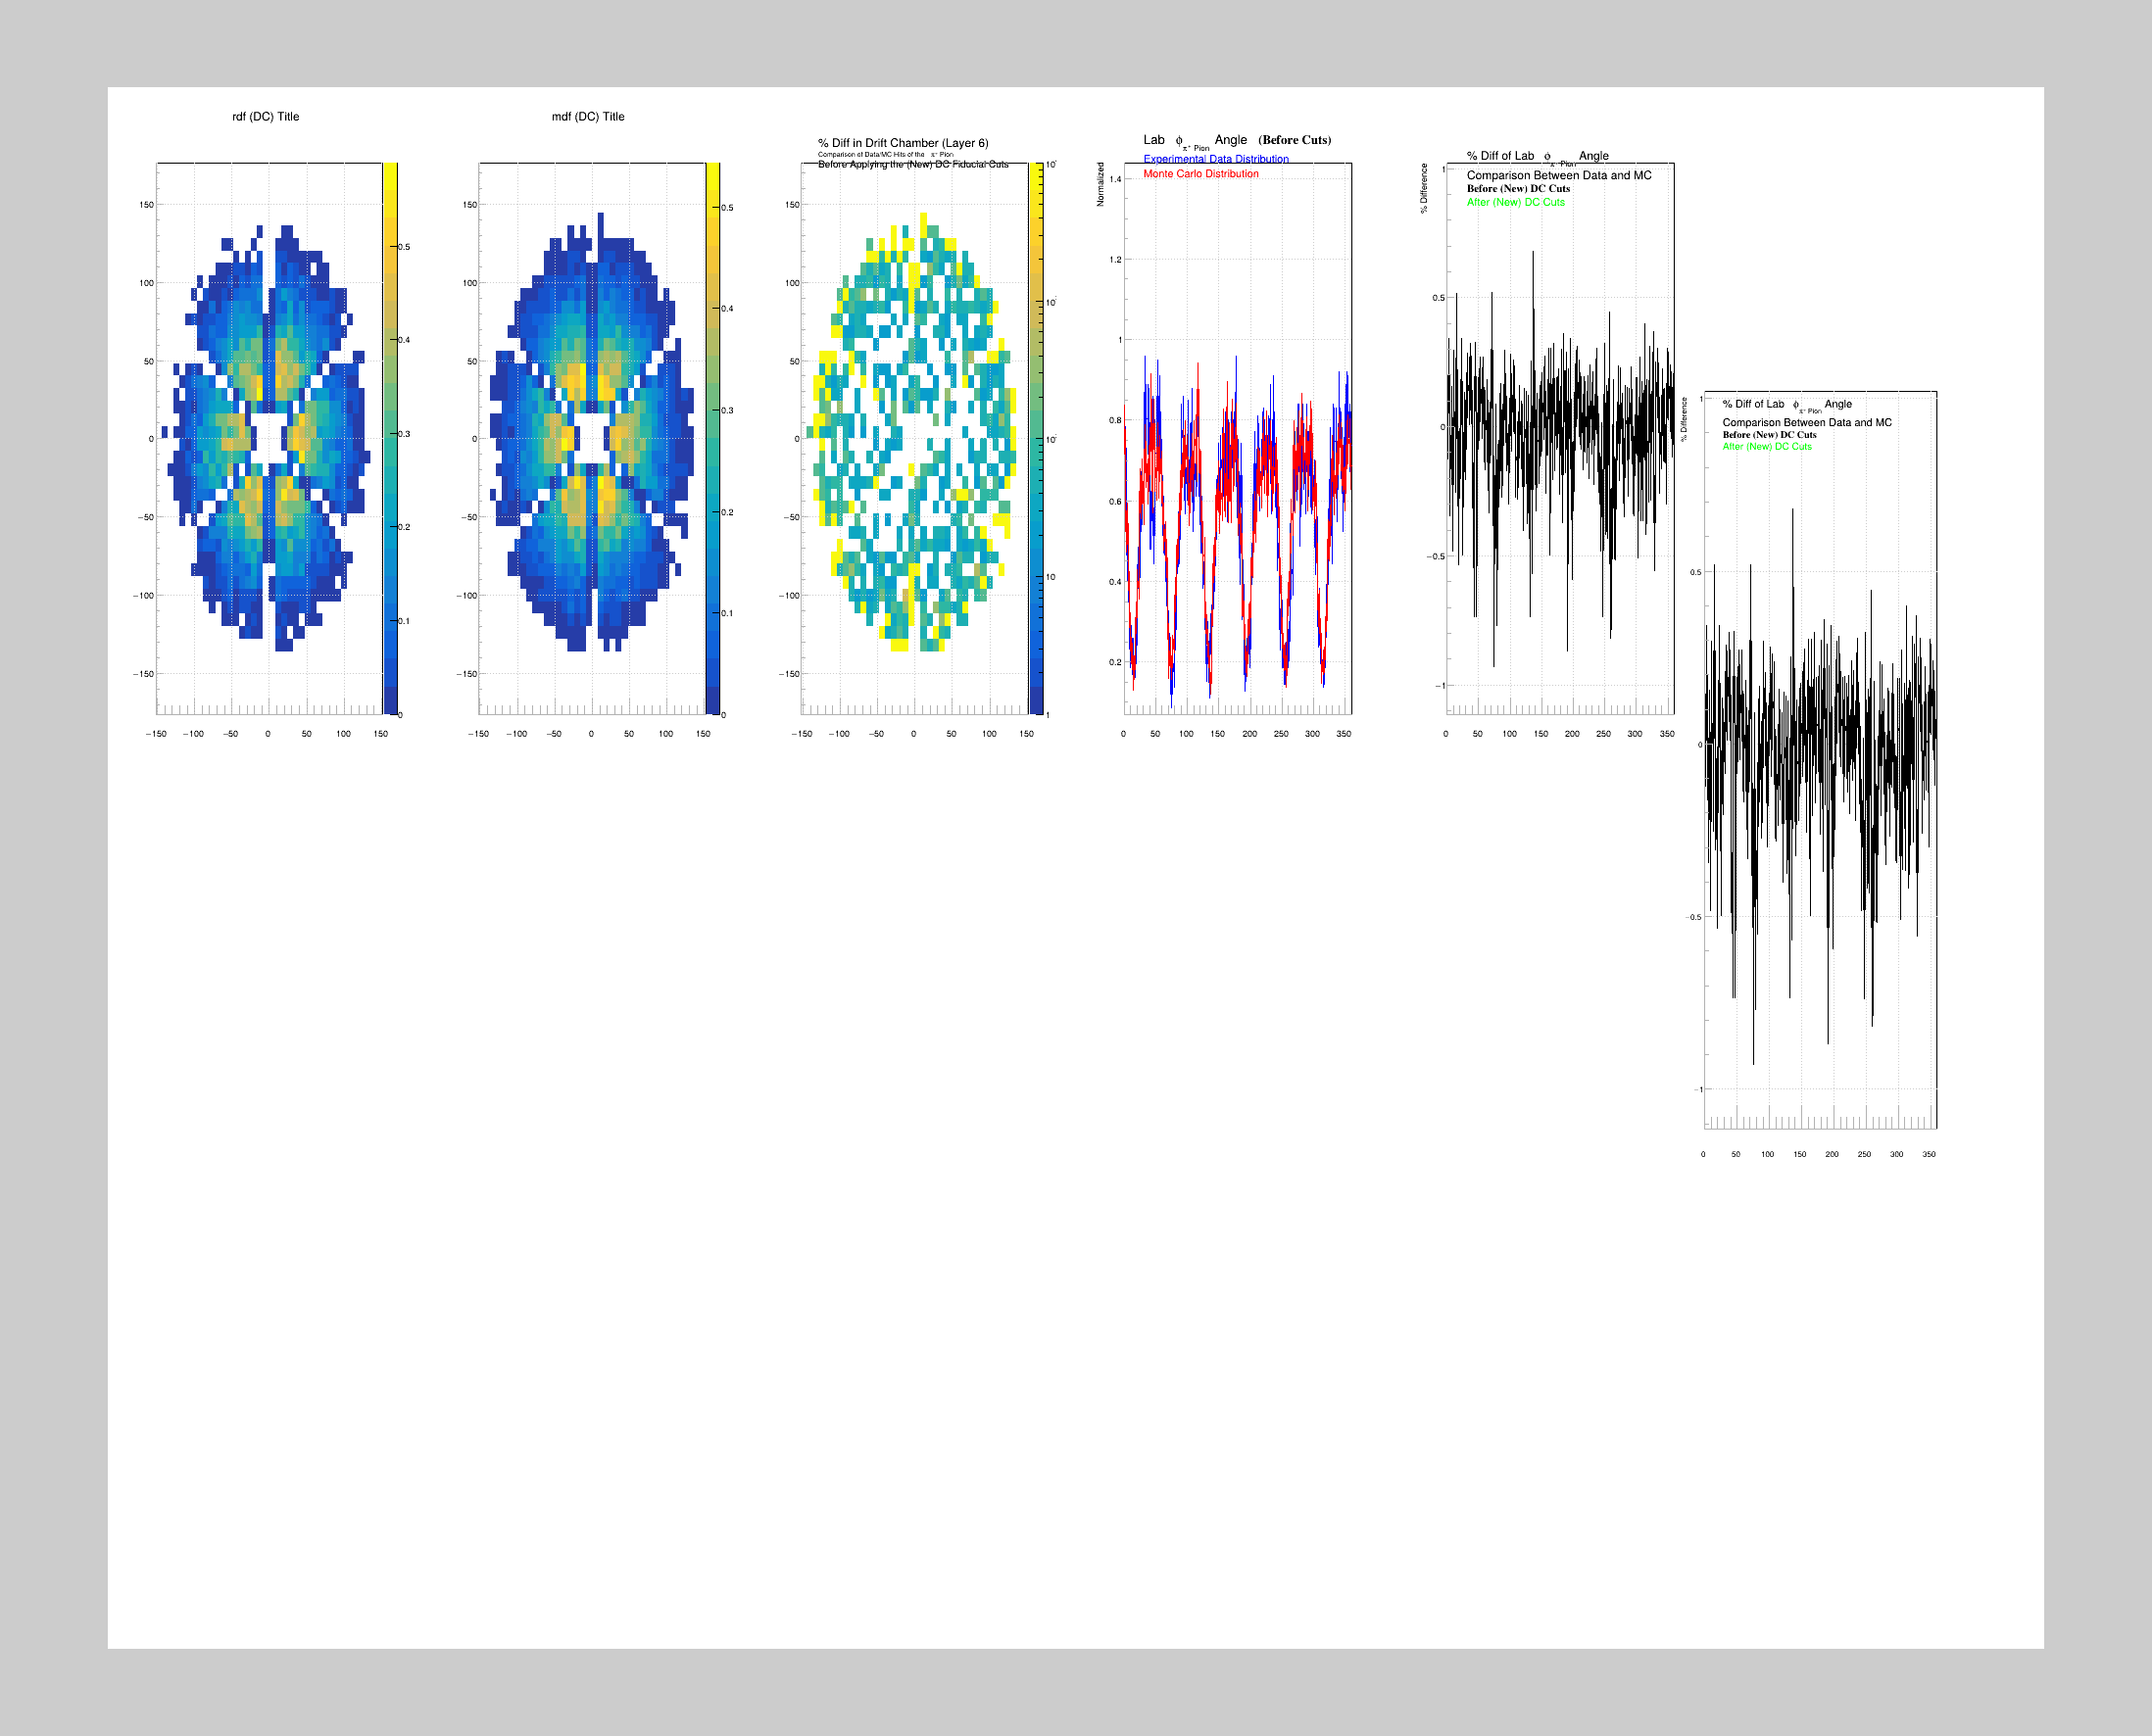

In [13]:
canvas["RDF_pip_DC_Layer_6_Main"].Draw()
